# Matrix of common words in document corpus

This notebook shows how, based on a corpus of documents, create a heat map for a corpus. 
As usual we start by loading the libraries we will need:

In [1]:
# Import libraries to load data in directory
# to manage files in path
from os import listdir
from os.path import isfile, join
# To use regular expressions
import re
# For matrices
import numpy as np
# NLP and stop words
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
# For plotting heat map
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

Let's save English stopwords to a list 

In [2]:
stop = stopwords.words('english')
print stop

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

The following function returns a list of file names contained in folder found in a given path

In [3]:
def get_files(mypath):
    """
    Function that get all the files contained in a given path
    Returns list of files names
    mypath: Location of folder containing the files
    return: list of file names
    """
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    return onlyfiles

Function that tokenizes files content and filters it by removing stopwords

In [4]:
def process_file(file_name):
    """
    Function that does the processes of a file
    It removes spaces, punctuation, symbols, numbers, etc.
    Finally tokenized the processed text after removing stopwords
    file_name: name of file to be processed
    return: list of clean and processed tokens
    """
    # Open file...
    with open (path_+file_name, "r") as myfile:
        # ... and read content
        data=myfile.read()
    # "Remove chomps" , strip and make text lowercase
    content = data.replace('\n',' ').lower().strip()
    # Remove punctuation and such
    content = re.sub(r'[^a-z0-9\s]','',content)
    # Tokenize the just cleaned content...
    tokens = nltk.word_tokenize(content)
    # ... and update by selecting tokens of lenght greater than 1
    tokens = [token for token in tokens if len(token) > 1]
    # Finally return list of words that are not stopwords
    filtered_words = [word for word in tokens if word not in stop]
    return filtered_words

The following function processes a collection of files with names stored in list_files

In [5]:
def process_files(list_files):
    """
    Function that applies the process_file(file_name) function to a list
    containing names of files
    list_files: list of file names
    return: list of tokenized documents in form of lists
    """
    # Initialized list to be returned with an empty list
    tokens_list = []
    # For each file in the list of file names...
    for file_name in list_files:
        # ... process the file in turn ...
        filtered_words = process_file(file_name)
        # ... and append it to the list to be returned
        tokens_list.append(filtered_words)
    return tokens_list
        

We now write two functions; one will count the number of unique common words contained in two given lists and the other one the number of common words in a given list(document). Recall that each list represents a document of the corpus

In [6]:
def common_words_two_lists(list1,list2):
    """
    Function that provides the number of unique common words in two given lists
    list1, list2: lists representing document1 and document2, respectively
    return: number of unique common words to both lists
    """
    # Create the intersection of unique common words
    common_words = set(list1)&set(list2)
    return len(common_words)


def words_in_list(list):
    """
    Function that counts the number of unique words in a document represented by a list
    list: list representing the pre-processed docuemnt
    return: number of unique words in document
    """
    unique_words = set(list)
    return len(unique_words)


The following function returns a matrix that contains in the diagonal the number of unique words contained in ith document (i is the index representing the number of document in corpus). The off-diagonal elements A_ij contain the number of unique common words in ith and jth document

In [7]:
def get_matrix(list_processed_files):
    """
    Function that determines the matrix described in the comment above
    list_processed_files: list representing the processed corupus of documents
    return: symmetric matrix with the word count of each pair of documents
    """
    # Get number of documents in corpus
    n_ = len(list_processed_files)
    # Initialize matrix with a square matrix of zeroes
    A = np.zeros((n_,n_))
    # The following two for loops scan only through the upper-triangular part of the matrix
    # In the first loop ...
    for i in range(n_):
        # ... we compute the elements of the diagonal ...
        A[i][i] = words_in_list(list_processed_files[i])
        # ...while in the second loop ...
        for j in range(i+1,n_):
            # ... we compute the off-diagonal elements. Notice we skip the element A_ii as 
            # it has already been computed in the previous look
            A[i][j] = common_words_two_lists(list_processed_files[i],list_processed_files[j])
            # We copy the recently computed element to the lower-triangular counterpart
            A[j][i] = A[i][j]
    return A
    

In [8]:
def heatMap_from_matrix(A):
    """
    Function that plots the heat map associated with the matrix A
    A: symmetric matrix with word counts
    returns: none but shows the heat map
    """
    # Reference
    # http://stackoverflow.com/questions/14391959/heatmap-in-matplotlib-with-pcolor

    list_idx = [str(i+1) if ((i+1)%10 == 0) else ' ' for i in range(100)]
    column_labels = list_idx
    row_labels = list_idx
    data = A
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(column_labels, minor=False)


    plt.show()

We now execute the sequence of functions written above

In [9]:
path_ = '/dir/files/'

In [10]:
list_files = get_files(path_)

In [11]:
list_processed_files = process_files(list_files)

In [12]:
A = get_matrix(list_processed_files)

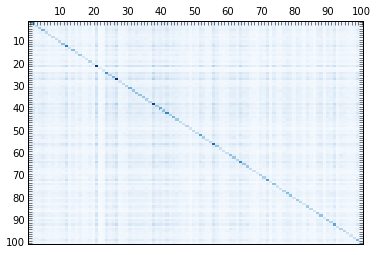

In [13]:
heatMap_from_matrix(A)